# plot ATAC coverage
run in [central jhub](https://jupyter.internal.sanger.ac.uk/) R4.4.0 env

!!! attempt to install any packages will fail !!!

In [1]:
.libPaths('/software/cellgen/cellgeni/R_ATAC/') # dependencies are installed here
source('/nfs/cellgeni/tickets/tic-3942/actions/ovary/bin/plotATACCoverage.R') # function defenitions

Loading required package: seqminer



In [2]:
# define paths to inputs data
path = '/lustre/scratch127/cellgen/cellgeni/tickets/tic-3942/'
# sample_id to fragment file link
fragments_paths = read.csv(paste0(path,'actions/samples.csv'))
fragments_paths$fragment_file = paste0(fragments_paths$filedir,'/fragments.tsv.gz')

# celltype annotation
barcodes = read.csv(paste0(path,'work/scanvi_out/combined_gene_matrix_plus_ref_clean_scanvi_raw_obs.csv'))
# gene coordinates (longest protein coding isoform per gene based on 2020A 10x reference)
# gtf=readRDS(paste0(path,'gtf_longest_tr.rds')) # to plot longest protein coding isoform
gtf=readRDS(paste0(path,'gtf_all_exons_on_one_transc.rds')) # to plot all exons of the gene on one line
# cell*peak counts. loaded only for normalization normalization
atac = schard::h5ad2list(paste0(path,'work/results_snapatac2_call_peaks/subset_adatas/peak_mat_granulosa.h5ad')) # granulosa only (faster to load than whole object)
# atac = schard::h5ad2list(paste0(path,'work/results_snapatac2_call_peaks/subset_adatas/peak_mat.h5ad')) # all celltypes
celltype_totals = sapply(split(atac$obs$total_counts,atac$obs$celltype),sum)

In [3]:
# peak to plot
peak = pasreCoors('chr12:121748806-121749307')
# celltypes to plots
cts = c('Granulosa_sq','Granulosa_sq_atr','Granulosa_sq_transitioning','Granulosa_AMH_early','Granulosa_AMH_ml')
# margin width to include into plot
margin = 5e4
c1=getCoverage(fragments_paths,barcodes,peak,dedupl=FALSE,margin=margin)

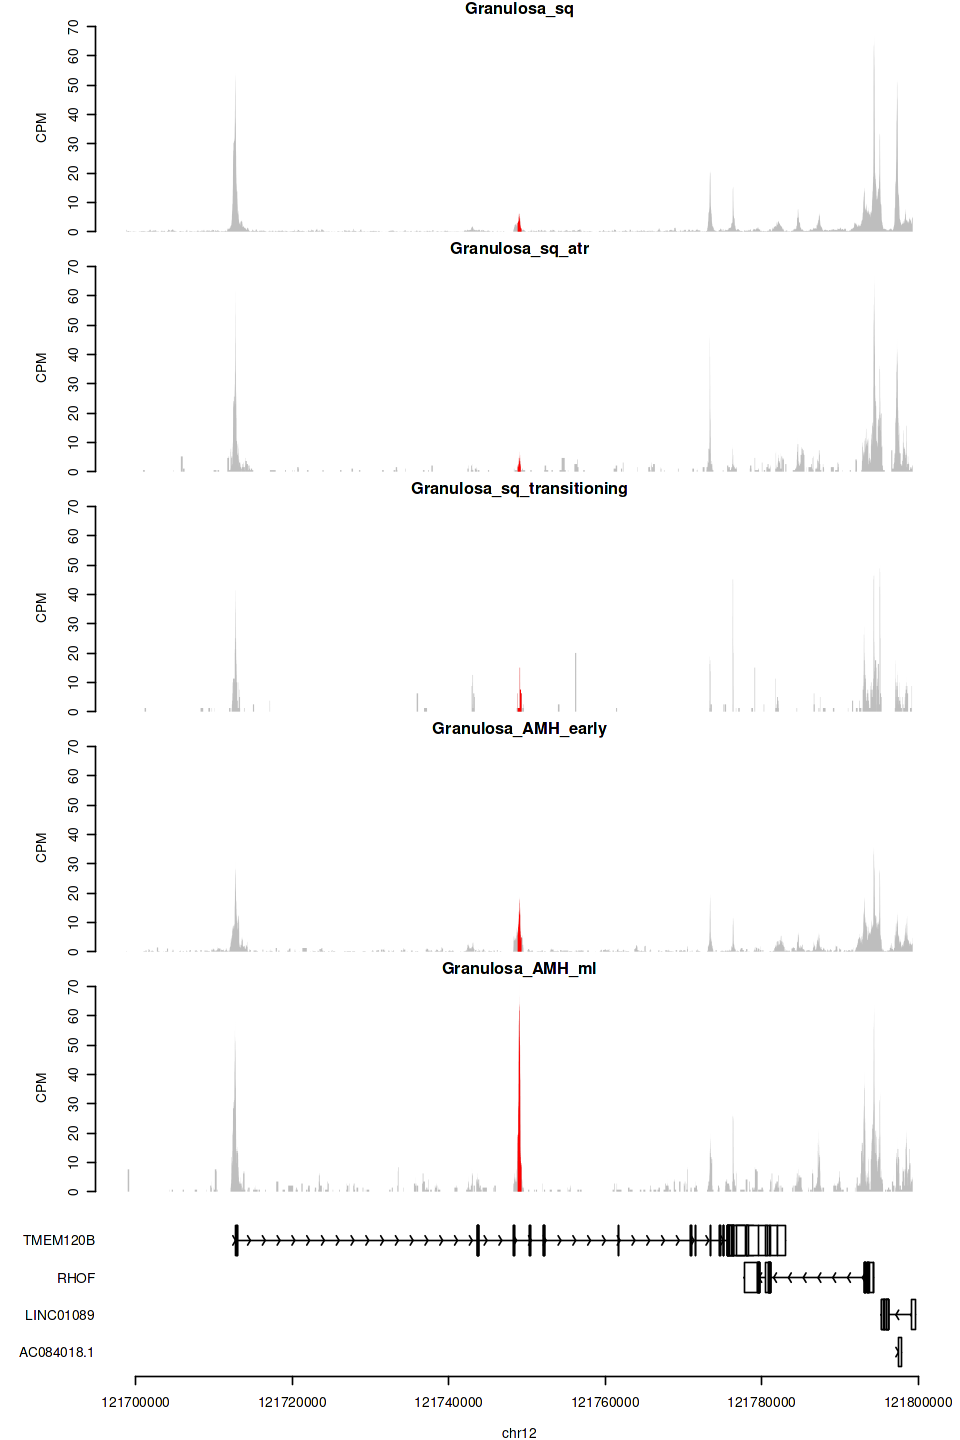

In [4]:
options(repr.plot.width=8, repr.plot.height=2*(1+length(cts)))
plotCoverages(c1[cts],celltype_totals[cts]/1e6,ylab='CPM',
              region2mark = peak,
              gtf=gtf,
              xaxt='n',xlab='',ylim=NULL)

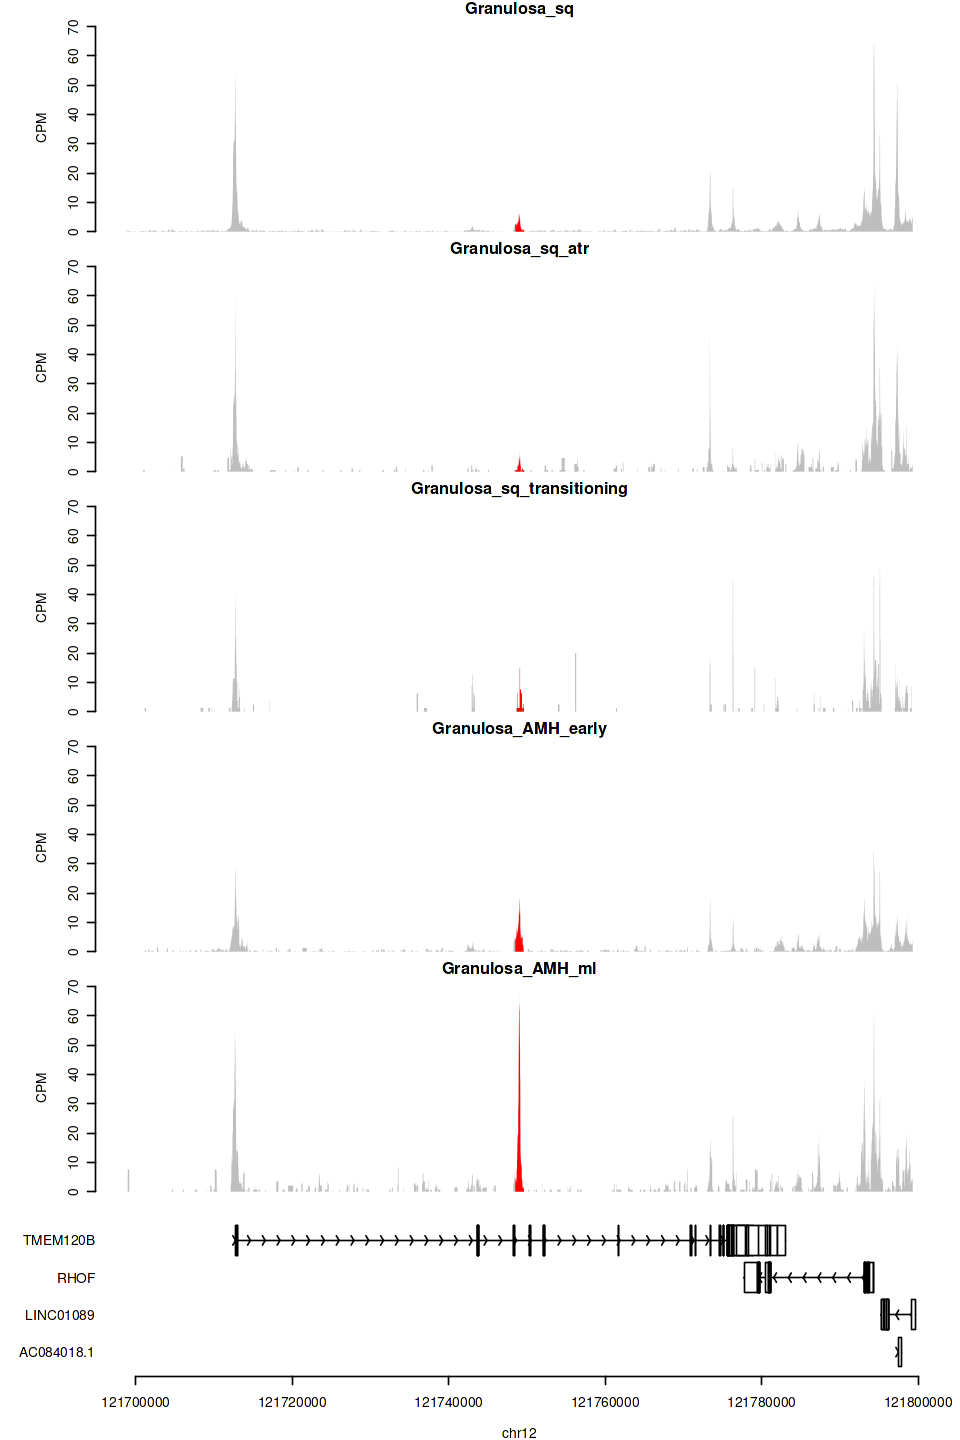

In [5]:
# peak coordinates looks bit more narrow than actual coverage peaks so lets extend area to show in red
region2mark = peak
region2mark$start = region2mark$start - 300
region2mark$end = region2mark$end + 300 
plotCoverages(c1[cts],celltype_totals[cts]/1e6,ylab='CPM',
              region2mark = region2mark,
              gtf=gtf,
              xaxt='n',xlab='',ylim=NULL)

In [6]:
# or one can jsut explicitly give the region with no margins
region = list(chr='chr12',start = 121705000,end=121820000)
c2=getCoverage(fragments_paths,barcodes,region,dedupl=FALSE)

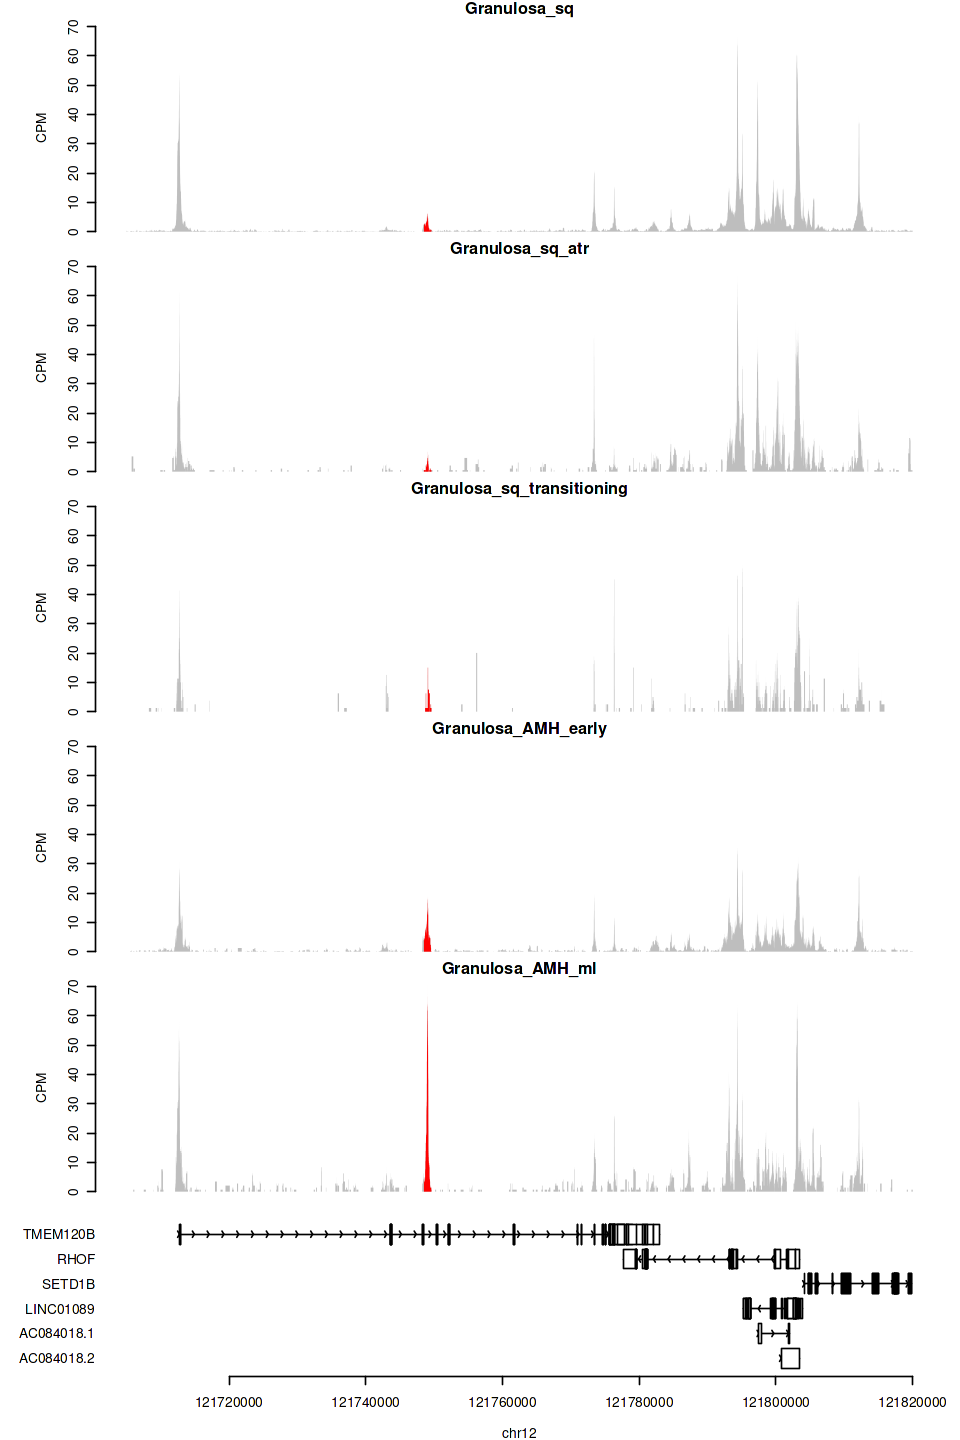

In [7]:
options(repr.plot.width=8, repr.plot.height=2*(1+length(cts)))
plotCoverages(c2[cts],celltype_totals[cts]/1e6,ylab='CPM',
              region2mark = region2mark,
              gtf=gtf,
              xaxt='n',xlab='',ylim=NULL)